In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

base_dir = '../data/fashion'
print(os.listdir(base_dir))

['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']


In [9]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')

In [10]:
X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [11]:
X_train.shape

(60000, 784)

Given the dtypes, there is no possibility of negative values in the dataset. 

## Introduction
Dataset description: 
* 60k training images 
* 10k test set
* 28x28 or 784 pixels per image

Class labels: 
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot



In [12]:
X_train.shape

(60000, 784)

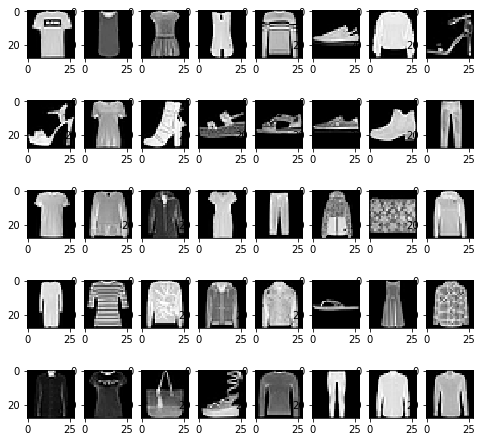

In [27]:
import numpy as np
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 8
rows = 5

for i in range(1, columns*rows +1):
    img = X_train[i].reshape((28, 28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()


## SNE Printing for complexity analysis

In [4]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
from glob import glob
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, RobustScaler

In [5]:
smp_sz = 5000
label_to_id_dict = {v:i for i,v in enumerate(np.unique(y_train[:smp_sz]))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

def visualize_scatter(data_2d, label_ids, figsize=(20,20)):
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    color= plt.cm.Set1(label_id / float(nb_classes)),
                    linewidth='1',
                    alpha=0.8,
                    label=id_to_label_dict[label_id])
    plt.legend(loc='best')

In [6]:

tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(X_train[:smp_sz])

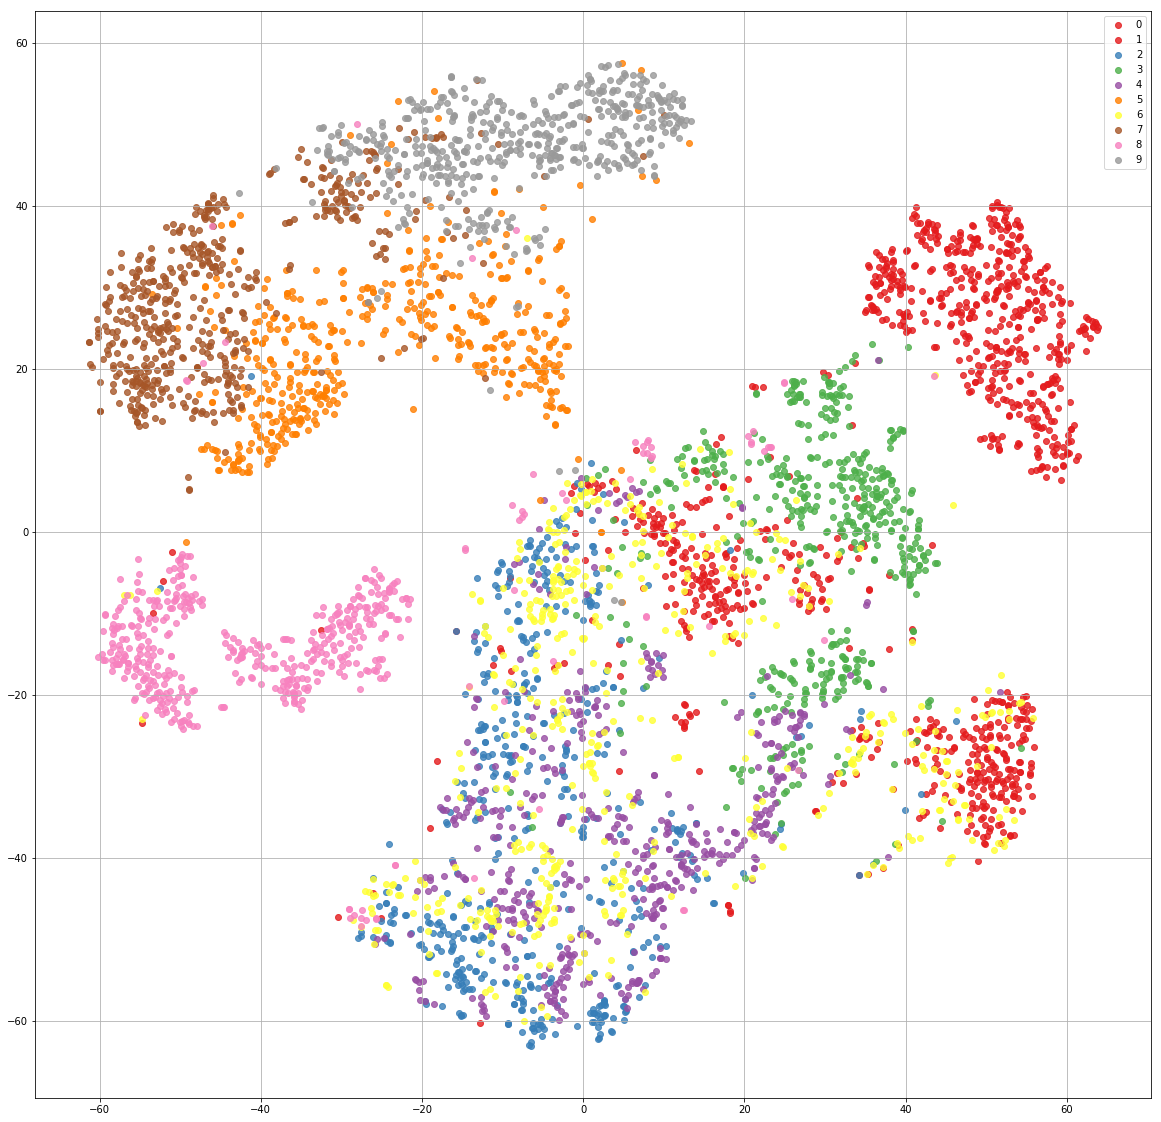

In [7]:
visualize_scatter(tsne_result, y_train[:smp_sz])

In [8]:
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

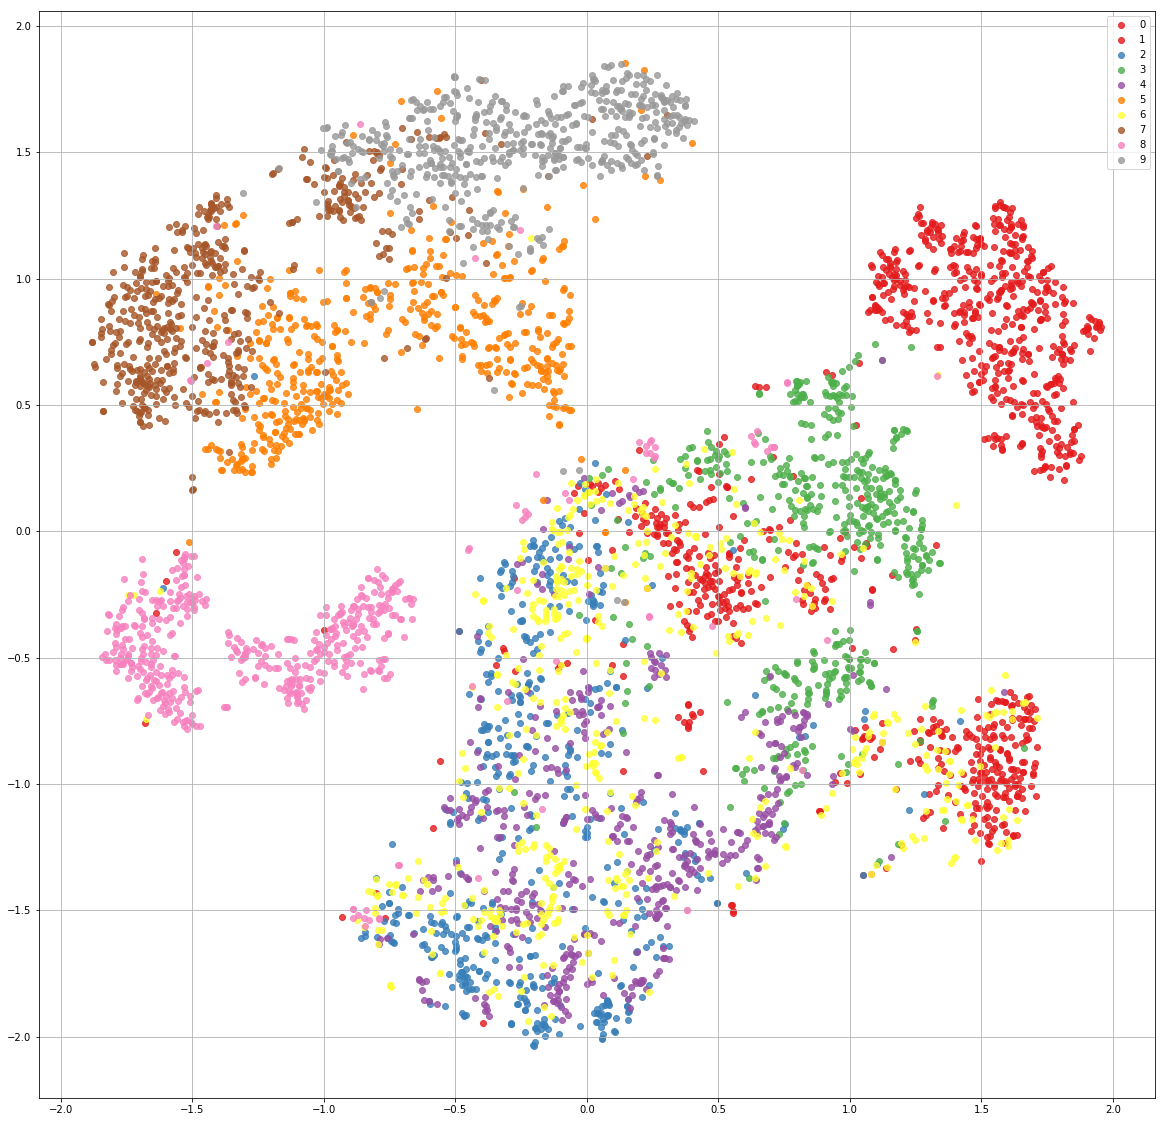

In [9]:
visualize_scatter(tsne_result_scaled, y_train[:smp_sz])

## TSNE Analysis
From the plot is possible to see that the scaling had no effect on the class visualization after the TSNE, there are some classes with a big confusion such as (6, 4 and 2). 

In [ ]:
import sys 
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from NN import network, activation_functions, loss_functions
from NN import ANN

import time
import timeit
from utils import dataset_helper
from utils import custom_scores
nclasses=10
eps = np.finfo(np.float32).eps
X = X_train
Y = y_train
Y = dataset_helper.one_hot_encode(Y, nclasses)
nfeatures = X.shape[1]
lr = .1
max_iter = 20 * X.shape[0]
print_interval = 10*1000

network.DEBUG = False

eps = np.finfo(np.float32).eps

h1 = network.Layer(nfeatures, 128, 'sigmoid',  label="H1")
h2 = network.Layer(128, 256, 'sigmoid',  label="H2")
h3 = network.Layer(256, 96, 'sigmoid', label="H3")
o = network.Layer(96, nclasses, 'sigmoid', label="Output")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(h2)
model.add_layer(h3)
model.add_layer(o)
model.summary()


print("")
start = time.process_time()
model.fit(X, Y, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = 1,
          decay_iteractions= 2.5 * X.shape[0], decay_rate = 0.9,
#           X_val=X_val, Y_val=Y_val,
          print_interval=print_interval)

# Y_ = np.array(model.predict(X))
# Y_ = Y_.argmax(axis=-1).flatten()
# mae = np.absolute(Y.argmax(axis=-1) - Y_).mean()

# print("Time Spent ", time.process_time() - start)


# Y_val_ = np.array(model.predict(X_val))
# iteraction_log = network.get_iteration_log()

Model Summary
-------------------------------
H1      (input=784, neurons=128, activation=sigmoid)
H2      (input=128, neurons=256, activation=sigmoid)
H3      (input=256, neurons=96, activation=sigmoid)
Output  (input=96, neurons=10, activation=sigmoid)
-------------------------------

Shuffled
It: 10000 Batch: 10000 Epoch 0 Error: 3.25050465 lr: 0.100000 
It: 20000 Batch: 20000 Epoch 0 Error: 3.25082973 lr: 0.100000 
It: 30000 Batch: 30000 Epoch 0 Error: 3.25082973 lr: 0.100000 


In [ ]:
Y.shape